In [79]:
from nbstore import set_formatter

set_formatter("matplotlib", "svg")

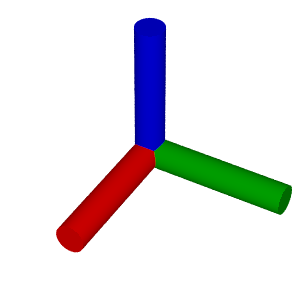

In [81]:
# #positioning
from fdray import *

Scene(
    Camera(longitude=30, latitude=40),
    LightSource(0, Color("white")),  # at camera location
    Cylinder(0, (1, 0, 0), 0.1, Color("red")),
    Cylinder(0, (0, 1, 0), 0.1, Color("green")),
    Cylinder(0, (0, 0, 1), 0.1, Color("blue")),
).render(width=300, height=300)

In [45]:
# #view-scale-source
def scene(view_scale: float):
    return Scene(
        Camera(0, 0, view_scale=view_scale),
        LightSource(0, Color("white")),
        Cylinder("-y", "y", 0.2, Color("green")),
        Cylinder("-2*y", "2*y", 0.15, Color("green")),
        Cylinder("-3*y", "3*y", 0.1, Color("green")),
        Cylinder("-z", "z", 0.2, Color("blue")),
        Cylinder("-2*z", "2*z", 0.15, Color("blue")),
        Cylinder("-3*z", "3*z", 0.1, Color("blue")),
        Background(Color("gray")),
    ).render(width=150, height=150)

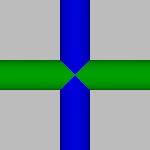

In [46]:
# #view-scale-1
scene(1)

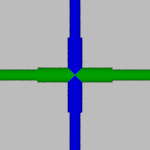

In [47]:
# #view-scale-2
scene(2)

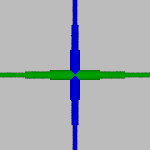

In [48]:
# #view-scale-3
scene(3)

## Distance

### Overview

The `distance` parameter controls the camera's perspective effect by adjusting the camera's position relative to the object's center. This parameter significantly affects how the 3D scene is rendered, particularly the perspective distortion.


In [49]:
# #distance-source
def scene(distance: float):
    return Scene(
        Camera(15, 10, view_scale=2, distance=distance),
        LightSource((1, 20, 40), Color("white")),
        Box(-1, 1, Color("green", 0.8)),
        Background(Color("gray", 0.2)),
    ).render(width=200, height=200)

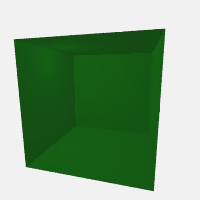

In [55]:
# #distance-3
scene(3)

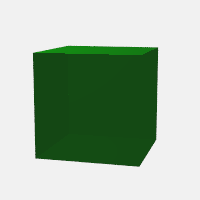

In [56]:
# #distance-10
scene(10)

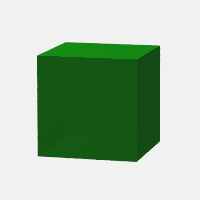

In [57]:
# #distance-30
scene(30)

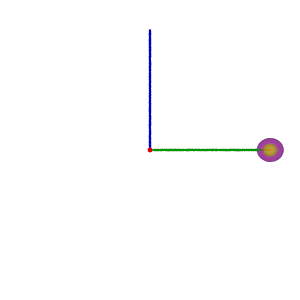

In [63]:
# #orbital-location-source
from math import asin, degrees, sqrt


def render(camera: Camera, *args):
    return Scene(
        camera,
        LightSource(0, "white"),
        Cylinder(0, "2*x", 0.02, Color("red")),
        Cylinder(0, "2*y", 0.02, Color("green")),
        Cylinder(0, "2*z", 0.02, Color("blue")),
        *args,
    ).render(width=300, height=300)


distance = 4
camera = Camera(0, 0, view_scale=2.5, look_at=(0, 0, 0), distance=distance)
norm = sqrt(distance**2 + 2**2)
angle = degrees(asin(2 / norm))
p1 = camera.orbital_location(norm / distance, angle, -90)
s1 = Sphere(p1, 0.2, Color("purple", 0.5))
p2 = camera.orbital_location(0.5, angle, -90)
s2 = Sphere(p2, 0.05, Color("orange", 0.5))
render(camera, s1, s2)

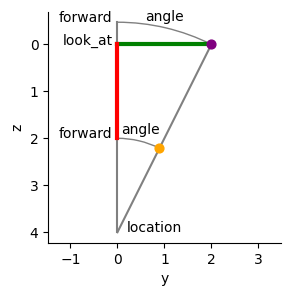

In [78]:
# #orbital-location-plot
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot([2, 0], [0, distance], c="gray")
ax.plot([0, 0], [distance, distance - norm], c="gray")
ax.add_patch(
    Arc(
        (0, distance),
        2 * norm,
        2 * norm,
        theta1=270,
        theta2=270 + angle,
        color="gray",
    ),
)
ax.add_patch(
    Arc(
        (0, distance),
        distance,
        distance,
        theta1=270,
        theta2=270 + angle,
        color="gray",
    ),
)
ax.plot([0, 2], [0, 0], c="green", lw=3)
ax.plot([0, 0], [0, 2], c="red", lw=3)
ax.scatter([p1.y], [p1.x], c="purple", zorder=100, s=40)
ax.scatter([p2.y], [p2.x], c="orange", zorder=100, s=40)
ax.text(0.2, distance, "location")
ax.text(-0.1, 0, "look_at", ha="right")
ax.text(-0.1, distance - norm, "forward", ha="right")
ax.text(-0.1, distance / 2, "forward", ha="right")
ax.text(1, -0.5, "angle", ha="center")
ax.text(0.5, 1.9, "angle", ha="center")
ax.invert_yaxis()
ax.axis("equal")
ax.set(xlabel="y", ylabel="z")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)